## Parameters

#### Config

In [ ]:
## packages
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })
ROOT = os.environ.get('ROOT', '')
SAVE = bool(os.environ.get('SAVE', False))

## toolkit
from src.triangulations import tri_circle, tri_rectangle
from src.fem import build_matricies, solve_fem

## config
tmax = 10000
dt = 0.01
triN = 16
L = 10
np.random.seed(0)

#### PDE

In [2]:
## pde config
N = 2
gamma = np.array([1, 0.02])
k2 = 11
def getr(k1):
    return lambda u: np.column_stack((
            k1 * (u[:, 1] - u[:, 0] * u[:, 1] / (1 + u[:, 1]**2)),
            k2 - u[:, 1] - 4 * u[:, 0] * u[:, 1] / (1 + u[:, 1]**2),
        ))

#### Parameters

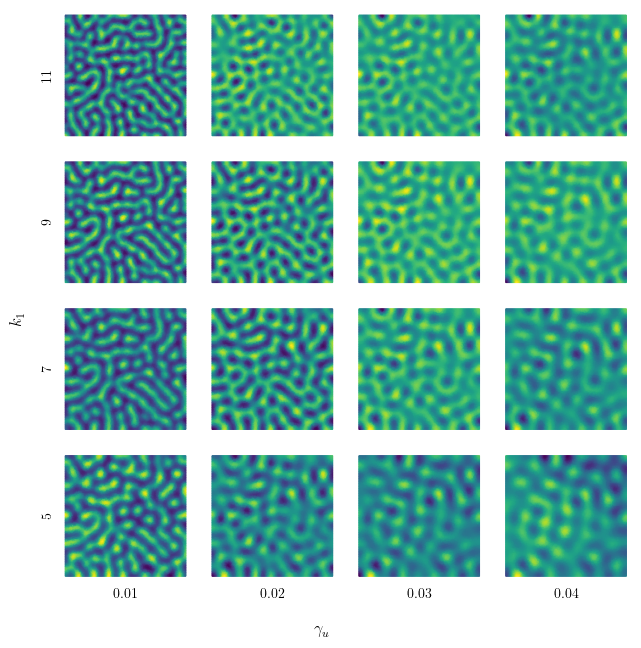

In [ ]:
## paramaters we look at
gammavs = [0.01, 0.02, 0.03, 0.04]
k1s = [5, 7, 9, 11]

## domain
pts, tris = tri_rectangle(L, L, triN)
damp_mat, stiff_mat = build_matricies(pts, tris)
n_pts = len(pts)
u0 = np.random.uniform(-1, 1, (n_pts, N))  # intiial condition

## plot setup
fig, axs = plt.subplots(len(k1s), len(gammavs))
fig.set_figwidth(6.5)
fig.set_figheight(6.5 * len(k1s) / len(gammavs))
fig.supxlabel(r'$\gamma_u$')
fig.supylabel('$k_1$')
for ax in axs.ravel():
    # ax.axis('off')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.axis('equal')
for gv, ax in zip(gammavs, axs[-1]):
    ax.set_xlabel(gv)
for k1, ax in zip(k1s[::-1], axs[:, 0]):
    ax.set_ylabel(k1)

## loop over the parameter choices
for i, k1 in enumerate(k1s[::-1]):
    for j, gv in enumerate(gammavs):
        ## solve the pde
        gamma[1] = gv
        r = getr(k1)
        u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)

        ## plot it
        axs[i, j].tripcolor(
                pts[:, 0],
                pts[:, 1],
                u[:, 0],
                triangles=tris,
                shading='gouraud',
            )

## final things
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/square_params.pdf', bbox_inches='tight')

## memory
del pts, tris, n_pts, stiff_mat, damp_mat, u0, u, fig, axs

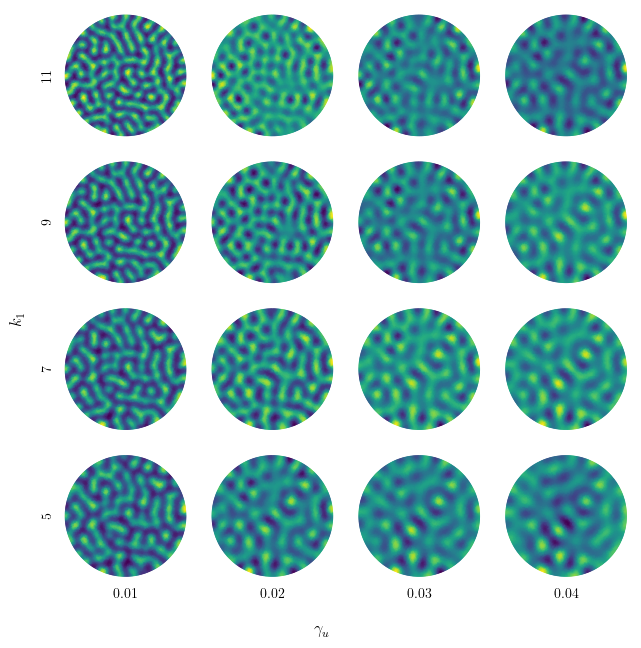

In [ ]:
## paramaters we look at
gammavs = [0.01, 0.02, 0.03, 0.04]
k1s = [5, 7, 9, 11]

## domain
pts, tris = tri_circle(L / 2, triN)
damp_mat, stiff_mat = build_matricies(pts, tris)
n_pts = len(pts)
u0 = np.random.uniform(-1, 1, (n_pts, N))  # intiial condition

## plot setup
fig, axs = plt.subplots(len(k1s), len(gammavs))
fig.set_figwidth(6.5)
fig.set_figheight(6.5 * len(k1s) / len(gammavs))
fig.supxlabel(r'$\gamma_u$')
fig.supylabel('$k_1$')
for ax in axs.ravel():
    # ax.axis('off')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.axis('equal')
for gv, ax in zip(gammavs, axs[-1]):
    ax.set_xlabel(gv)
for k1, ax in zip(k1s[::-1], axs[:, 0]):
    ax.set_ylabel(k1)

## loop over the parameter choices
for i, k1 in enumerate(k1s[::-1]):
    for j, gv in enumerate(gammavs):
        ## solve the pde
        gamma[1] = gv
        r = getr(k1)
        u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)

        ## plot it
        axs[i, j].tripcolor(
                pts[:, 0],
                pts[:, 1],
                u[:, 0],
                triangles=tris,
                shading='gouraud',
            )

## final things
fig.tight_layout()
if SAVE: fig.savefig(ROOT + 'paper/figures/circle_params.pdf', bbox_inches='tight')

## memory
del pts, tris, n_pts, stiff_mat, damp_mat, u0, u, fig, axs